# Wingspan Boardgame EDA #
This notebook contains EDA for the Wingspan Boardgame: https://stonemaiergames.com/games/wingspan/  <br>
I do not have an objective yet, but may at some point experiment with reinforcement learning to build a Wingspan AI.<br>
<br>
The data came from : https://www.kaggle.com/datasets/josephpaulmartin/wingspan-game-card-data <br>
<br>
I hope to build visualizations that give statistically backed recommendations for cards to play.<br>
<br>
![Wingspan](./Wingspan.png "Wingspan")

### Load the Data, Perform some counts ###

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [ ]:
data = pd.read_csv("./data/wingspan_game.csv")
data.head()

In [47]:
# Show me the columns
data.columns

Index(['Common name', 'Scientific name', 'Expansion', 'Color', 'PowerCategory',
       'Power text', 'Predator', 'Flocking', 'Bonus card', 'Victory points',
       'Nest type', 'Egg capacity', 'Wingspan', 'Forest', 'Grassland',
       'Wetland', 'Invertebrate', 'Seed', 'Fish', 'Fruit', 'Rodent', 'Nectar',
       'Wild (food)', '/ (food cost)', '* (food cost)', 'Total food cost',
       'Anatomist', 'Cartographer', 'Historian', 'Photographer',
       'Backyard Birder', 'Bird Bander', 'Bird Counter', 'Bird Feeder',
       'Diet Specialist', 'Enclosure Builder', 'Falconer', 'Fishery Manager',
       'Food Web Expert', 'Forester', 'Large Bird Specialist',
       'Nest Box Builder', 'Omnivore Expert', 'Passerine Specialist',
       'Platform Builder', 'Prairie Manager', 'Rodentologist',
       'Viticulturalist', 'Wetland Scientist', 'Wildlife Gardener',
       'Caprimulgiform Specialist', 'Small Clutch Specialist',
       'Endangered Species Protector', 'Beak Pointing Left',
       'Beak Po

In [ ]:
expansion_counts = data['Expansion'].value_counts()

# Custom autopct function to display counts and percentages
def autopct_func(pct, all_values):
    absolute = int(round(pct / 100.0 * sum(all_values)))
    return f"{absolute} ({pct:.1f}%)"

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    expansion_counts,
    labels=expansion_counts.index,
     autopct=lambda pct: autopct_func(pct, expansion_counts),
    startangle=90
)
plt.title("Number of Birds by Expansion")
plt.show()

In [ ]:
# Swift start is the same as Core
data['Expansion'] =data['Expansion'].replace("swiftstart", "originalcore")
data['Expansion'] =data['Expansion'].replace("originalcore", "base")
base = data[data['Expansion']=='base']
european = data[data['Expansion']=='european']
oceania = data[data['Expansion']=='oceania']
asia = data[data['Expansion']=='asia']
digital = data[data['Expansion']!='asia']

In [ ]:
numeric_columns = ['Egg capacity', 'Wingspan', 'Invertebrate', 'Seed', 'Fish', 'Fruit', 'Rodent', 'Nectar', 'Wild (food)', 'Total food cost']
data[numeric_columns] = data[numeric_columns].fillna(0)
data

## Expansion Statistics

In [44]:
color_mapping = {
    "Brown":"#744700",
    "Pink":"#FF7DA3",
    "White":"#EEEEEE",
    "Yellow":"#ffd966",
    "Teal":"#06C0C8"  
}

food_color_mapping = {
    'Invertebrate':"#38761d", 
    'Seed':"#bf9000", 
    'Fish':"#3d85c6", 
    'Fruit':"#cc0000", 
    'Rodent':"#5b5b5b", 
    'Nectar':"#ffb2d3", 
    'Wild (food)':"#6a329f"
}

In [66]:
def plot_expansion_stats(data):
    

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot pie chart at index 0 for Power Color
    color_counts = data['Color'].value_counts()
    colors = [color_mapping[val] for val in color_counts.index]
    axes[0].pie(
        color_counts,
        labels=color_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[0].set_title("Power Color Totals")

    # Plot pie chart at index 1 for Food
    # Specify columns to include in pie charts
    food = ['Invertebrate', 'Seed', 'Fish', 'Fruit', 'Rodent', 'Nectar', 'Wild (food)']
    food_totals = data[food].sum()
    food_colors = [food_color_mapping[val] for val in food_totals.index]
    print(food_totals)
    axes[1].pie(
        food_totals,
        labels=food_totals.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=food_colors
    )
    axes[1].set_title("Food Totals")

    # Subplot 2: Histogram
    axes[2].hist(data["Victory points"], bins=10, color="skyblue", edgecolor="black")    

    axes[2].set_title("Histogram of Victory Points Distribution")
    axes[2].set_xticks(range(10))
    axes[2].set_xlabel("Value")
    axes[2].set_ylabel("Frequency")

    # Adjust layout
    plt.tight_layout()
    plt.show()



### Base Game 

Invertebrate    130.0
Seed            102.0
Fish             39.0
Fruit            43.0
Rodent           35.0
Nectar            0.0
Wild (food)      37.0
dtype: float64


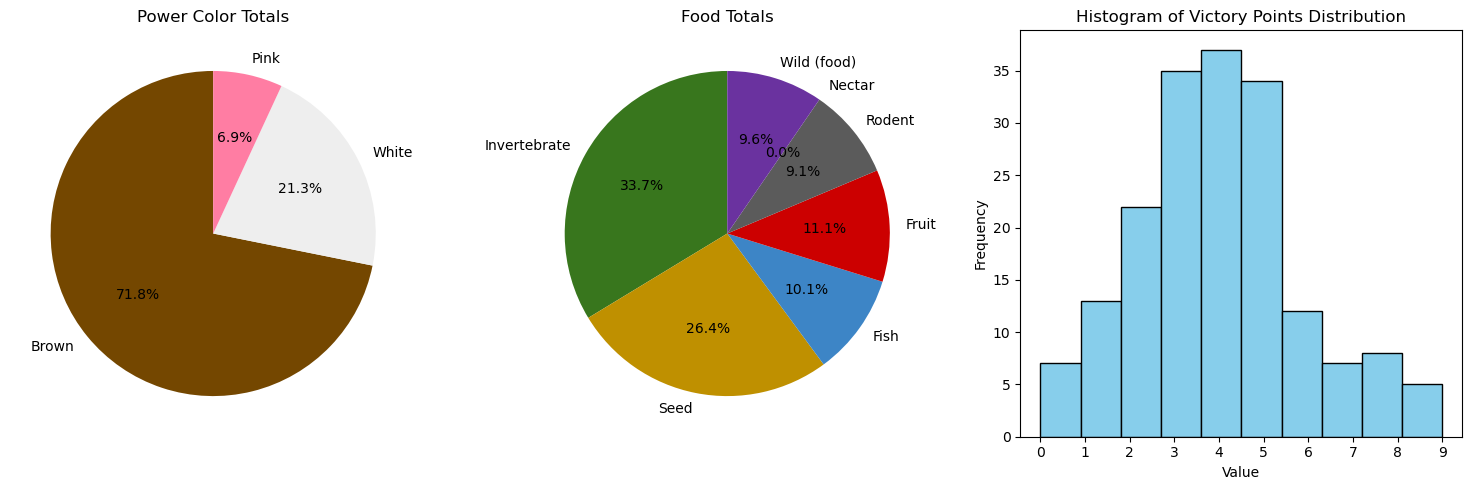

In [67]:
plot_expansion_stats(base)

### European Expansion

Invertebrate    62.0
Seed            48.0
Fish            19.0
Fruit           19.0
Rodent          20.0
Nectar           0.0
Wild (food)     14.0
dtype: float64


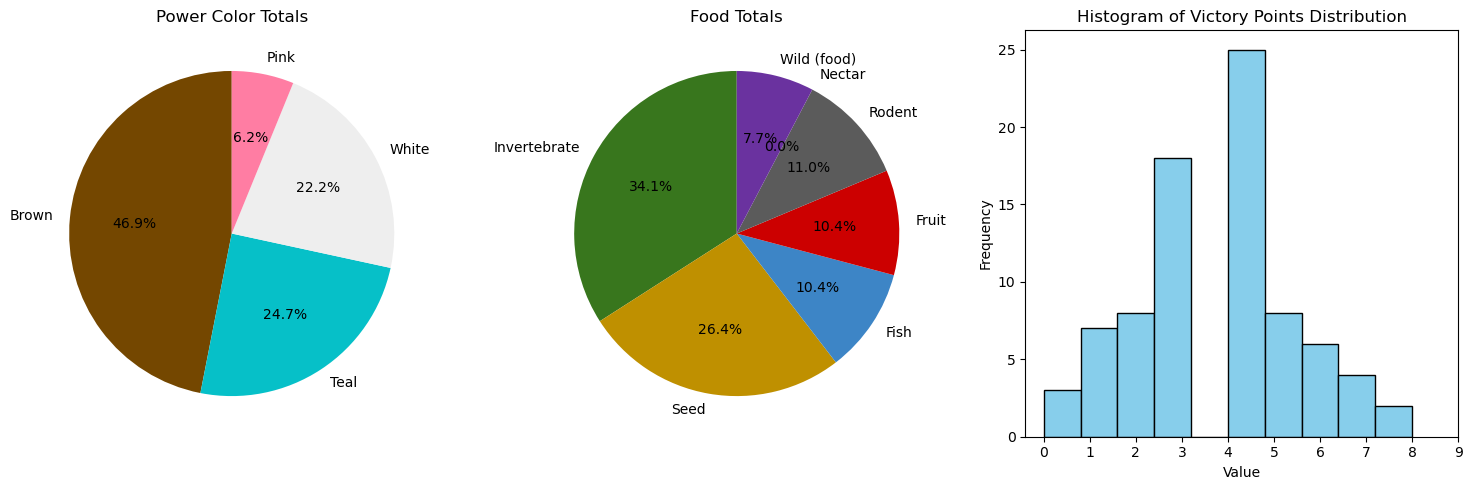

In [68]:
plot_expansion_stats(european)

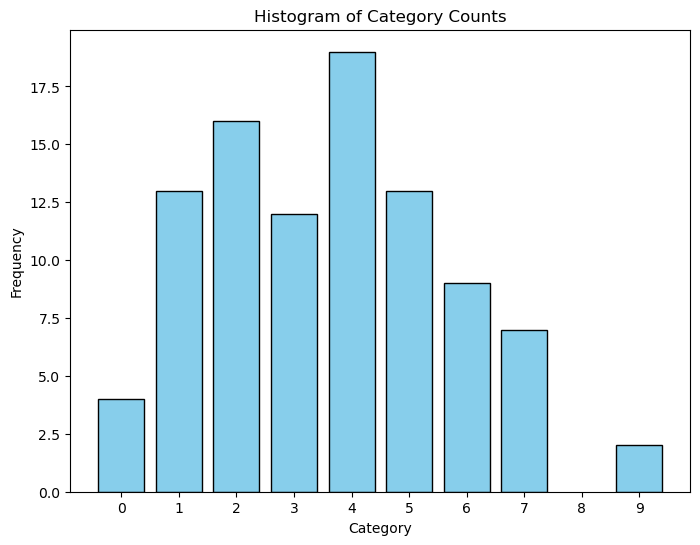

In [132]:
# Get value counts of the "Category" column
value_counts = oceania["Victory points"].value_counts()

# Plot histogram of value counts
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color="skyblue", edgecolor="black")

# Add labels and title
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Histogram of Category Counts")

# Display the plot
plt.show()

### Oceania

Invertebrate    61.0
Seed            45.0
Fish            21.0
Fruit           25.0
Rodent          22.0
Nectar          19.0
Wild (food)     18.0
dtype: float64


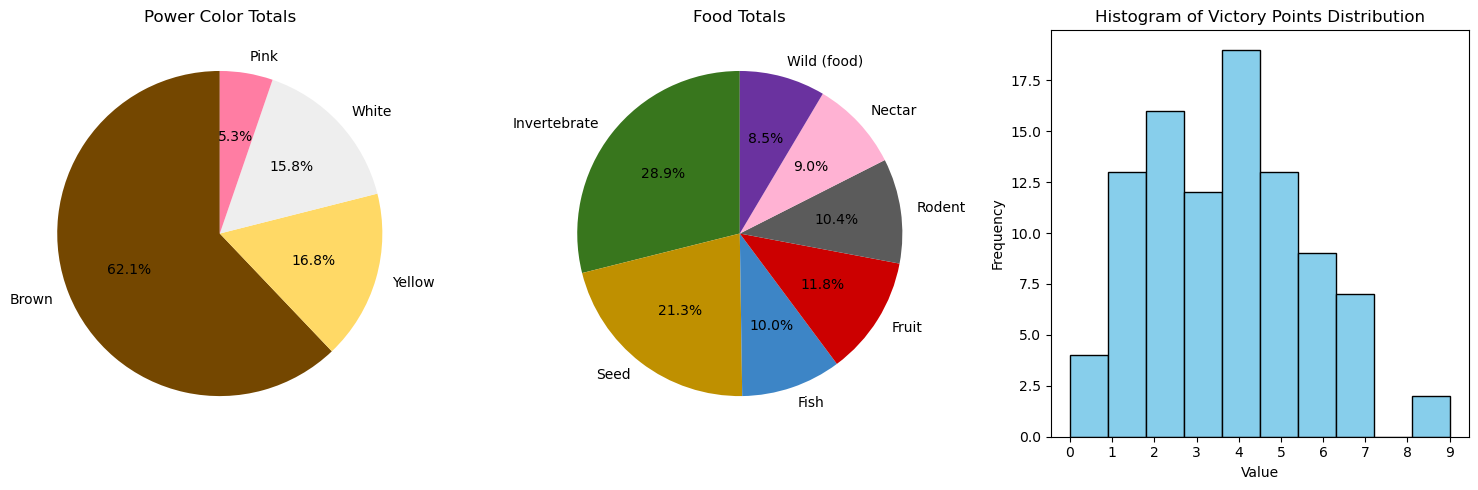

In [70]:
plot_expansion_stats(oceania)

### Digital Game (Base + European + Oceania)

Invertebrate    253.0
Seed            195.0
Fish             79.0
Fruit            87.0
Rodent           77.0
Nectar           19.0
Wild (food)      69.0
dtype: float64


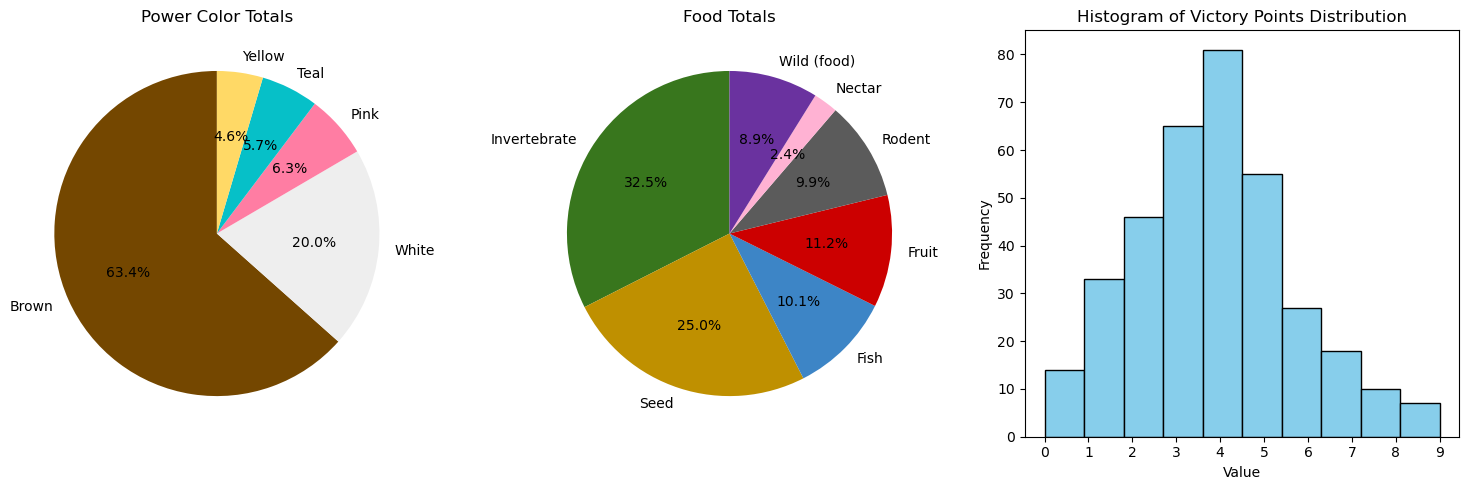

In [71]:
plot_expansion_stats(digital)

### Asia

Invertebrate    68.0
Seed            48.0
Fish            17.0
Fruit           26.0
Rodent          16.0
Nectar           0.0
Wild (food)     20.0
dtype: float64


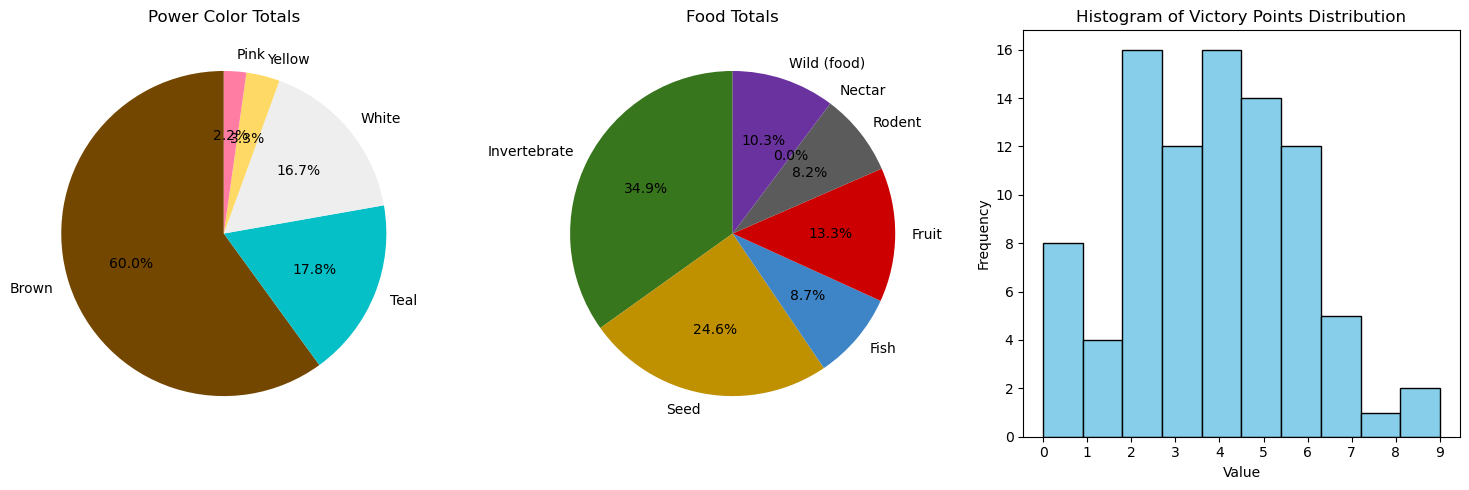

In [72]:
plot_expansion_stats(asia)

### All Expansions

Invertebrate    321.0
Seed            243.0
Fish             96.0
Fruit           113.0
Rodent           93.0
Nectar           19.0
Wild (food)      89.0
dtype: float64


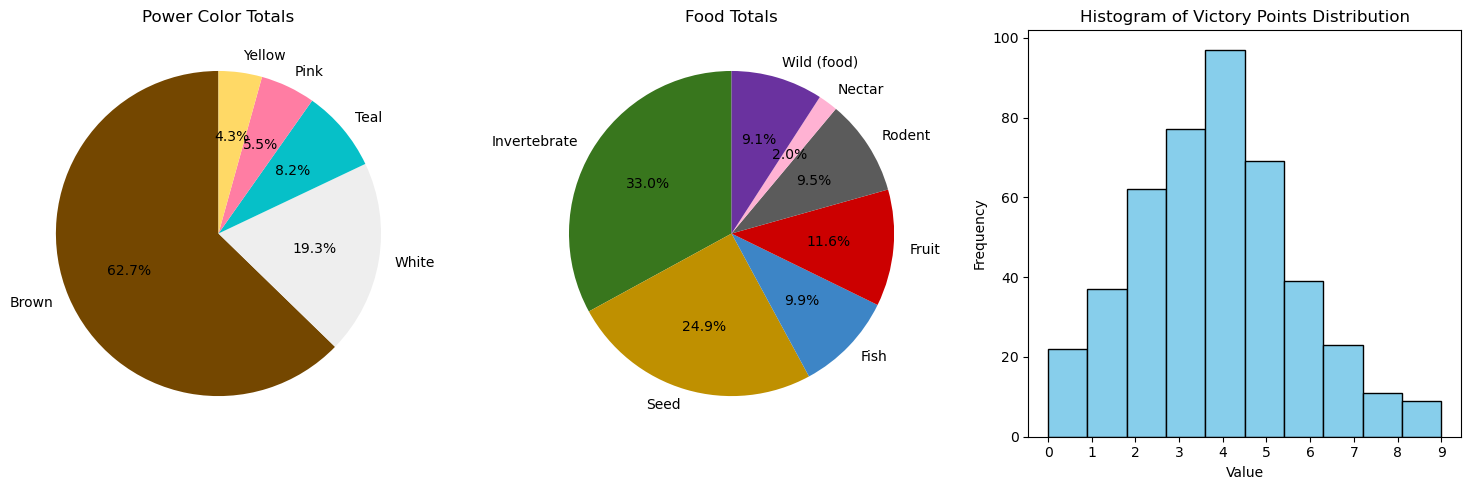

In [73]:
plot_expansion_stats(data)

In [80]:
print(data.dtypes)

Common name                   object
Scientific name               object
Expansion                     object
Color                         object
PowerCategory                 object
                               ...  
additionalRulings/5/source    object
additionalRulings/6/text      object
additionalRulings/6/source    object
rulings/3/text                object
rulings/3/source              object
Length: 79, dtype: object


In [125]:
digital["Forest"] = digital["Forest"].replace("X", 1)
digital["Grassland"] = digital["Grassland"].replace("X", 1)
digital["Wetland"] = digital["Wetland"].replace("X", 1)
digital['Forest']=digital['Forest'].fillna(0)
digital['Grassland']=digital['Grassland'].fillna(0)
digital['Wetland']=digital['Wetland'].fillna(0)
forest = digital[(digital['Forest']==1)&(digital['Grassland']==0) & (digital['Wetland']==0)]
grassland = digital[(digital['Forest']==0)&(digital['Grassland']==1) & (digital['Wetland']==0)]
wetland = digital[(digital['Forest']==0)&(digital['Grassland']==0) & (digital['Wetland']==1)]
forest_grassland = digital[(digital['Forest']==1)&(digital['Grassland']==1) & (digital['Wetland']==0)]
grassland_wetland = digital[(digital['Forest']==0)&(digital['Grassland']==1) & (digital['Wetland']==1)]
forest_wetland = digital[(digital['Forest']==1)&(digital['Grassland']==0) & (digital['Wetland']==1)]
all_habitats = digital[(digital['Forest']==1)&(digital['Grassland']==1) & (digital['Wetland']==1)]
forest.head()

C:\Users\JoeDavis\AppData\Local\Temp\ipykernel_19776\1141960013.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoeDavis\AppData\Local\Temp\ipykernel_19776\1141960013.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoeDavis\AppData\Local\Temp\ipykernel_19776\1141960013.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Common name,Scientific name,Expansion,Color,PowerCategory,Power text,Predator,Flocking,Bonus card,Victory points,...,rulings/1/text,rulings/1/source,rulings/2/text,rulings/2/source,additionalRulings/5/text,additionalRulings/5/source,additionalRulings/6/text,additionalRulings/6/source,rulings/3/text,rulings/3/source
1,Acorn Woodpecker,Melanerpes formicivorus,base,Brown,Caching Food,Gain 1 [seed] from the birdfeeder (if availabl...,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,American Redstart,Setophaga ruticilla,base,Brown,NaN,Gain 1 [wild] from the birdfeeder.,NaN,NaN,NaN,4,...,This bird does not count toward the <strong ap...,https://www.facebook.com/groups/wingspanboardg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Baltimore Oriole,Icterus galbula,base,Brown,Food from Supply,All players gain 1 [fruit] from the supply.,NaN,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Barred Owl,Strix varia,base,Brown,Hunting/Fishing,"Look at a [card] from the deck. If <75cm, tuck...",X,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Black Vulture,Coragyps atratus,base,Pink,Food from Birdfeeder,"When another player's predator succeeds, gain ...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,"Whenever you are entitled to gain resources, y...",https://www.stonemaiergames.com/games/wingspan...,NaN,NaN,NaN,NaN


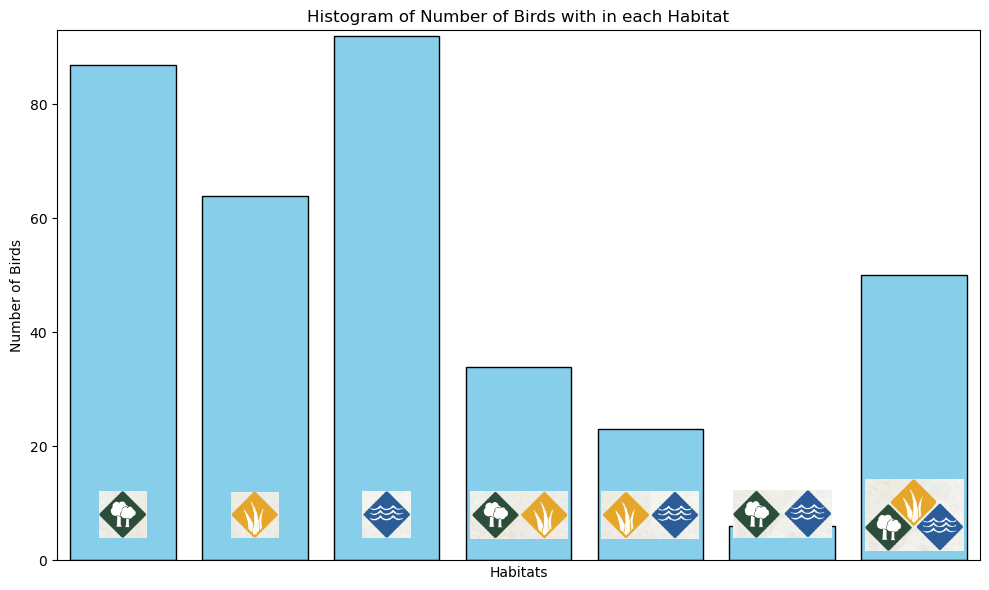

In [126]:
# Quick histogram of Habitats
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
habitats = [forest, grassland, wetland,forest_grassland,grassland_wetland,forest_wetland,all_habitats]
image_files = ["forest.png", "grassland.png", "wetland.png", "forest_grassland.png", "grassland_wetland.png", "forest_wetland.png","all_habitats.png"]
images = [mpimg.imread(img) for img in image_files]
habitat_counts = [len(df) for df in habitats]

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(1, len(habitats) + 1), habitat_counts, color="skyblue", edgecolor="black", width=0.8)

# Add labels and title
for i, (bar, img_path) in enumerate(zip(bars, image_files)):
    # Load the image
    image = plt.imread(img_path)
    # Create an OffsetImage
    offset_img = OffsetImage(image, zoom=.5)  # Adjust zoom for image size
    # Place the image below the bar
    x = bar.get_x() + bar.get_width() / 2  # Center image under the bar
    y = 8  # Adjust this value to position the image below the bars
    ab = AnnotationBbox(offset_img, (x, y), frameon=False, xycoords='data', box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# Hide default x-axis labels
ax.set_xlim(0.5, len(habitats) + 0.5)
ax.set_ylim(0, max(habitat_counts) + 1)
ax.set_xticks([])
ax.set_xlabel("Habitats")
ax.set_ylabel("Number of Birds")
ax.set_title("Histogram of Number of Birds with in each Habitat")

# Adjust layout and show
plt.tight_layout()
plt.show()


In [131]:
import plotly.express as px
import plotly.graph_objects as go


fig= go.Figure()
fig.add_trace(go.Violin(y=forest['Victory points'], marker_color='green', fillcolor='green', jitter=0.5, points='all', name='Forest',customdata=forest["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))
fig.add_trace(go.Violin(y=grassland['Victory points'],  marker_color='orange',fillcolor='orange', jitter=0.5, points='all', name='Grassland',customdata=grassland["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))
fig.add_trace(go.Violin(y=wetland['Victory points'],  marker_color='blue',fillcolor='blue', jitter=0.5, points='all', name='Wetland',customdata=wetland["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))
fig.add_trace(go.Violin(y=forest_grassland['Victory points'],  marker_color='brown', fillcolor='brown', jitter=0.5, points='all', name='Forest/Grassland',customdata=forest_grassland["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))
fig.add_trace(go.Violin(y=grassland_wetland['Victory points'],  marker_color='red',fillcolor='red', jitter=0.5, points='all', name='Grassland/Wetland',customdata=grassland_wetland["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))
fig.add_trace(go.Violin(y=forest_wetland['Victory points'],  marker_color='purple',fillcolor='purple', jitter=0.5, points='all', name='Forest/Wetland',customdata=forest_wetland["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))
fig.add_trace(go.Violin(y=all_habitats['Victory points'], marker_color='black',fillcolor='black', jitter=0.5, points='all', name='All Habitats',customdata=all_habitats["Common name"],  # Add extra data for hover
            hovertemplate=(
                "Bird: %{customdata}<br>"  # custom Hover Data (Bird Name)
                "Value: %{y}<br>"  # y-axis value
                "<extra></extra>"  # Remove secondary box in hover
            )))

fig.update_layout(title='Habitat Points Breakdown', yaxis=dict(gridcolor='rgb(255,255,255)', gridwidth=3),
                  paper_bgcolor='rgb(243,243,243)', plot_bgcolor='rgb(243,243,243)')
fig.show()

      Name  Age sex
0    Alice   25   F
1      Bob   30   M
2  Charlie   35   M
